In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart

import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')



dataset/stations.csv
dataset/city_day.csv
dataset/city_hour.csv
dataset/station_hour.csv
dataset/station_day.csv


In [2]:
city_day = pd.read_csv('dataset/city_day.csv')
#city_hour = pd.read_csv('../input/air-quality-data-in-india/city_hour.csv')
#station = pd.read_csv('../input/air-quality-data-in-india/stations.csv')
#station_day = pd.read_csv('../input/air-quality-data-in-india/station_day.csv')
#station_hour = pd.read_csv('../input/air-quality-data-in-india/station_hour.csv')
#cities_db = pd.read_csv('../input/indian-cities-database/Indian Cities Database.csv')

In [3]:
display("CITY DAILY DATA")
display(city_day.head(5))

'CITY DAILY DATA'

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
city_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='Blues')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
Toluene,8041,27.200000
Benzene,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


In [6]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object', name='City')


In [7]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace=True)

In [8]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


In [9]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);

In [10]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

In [11]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

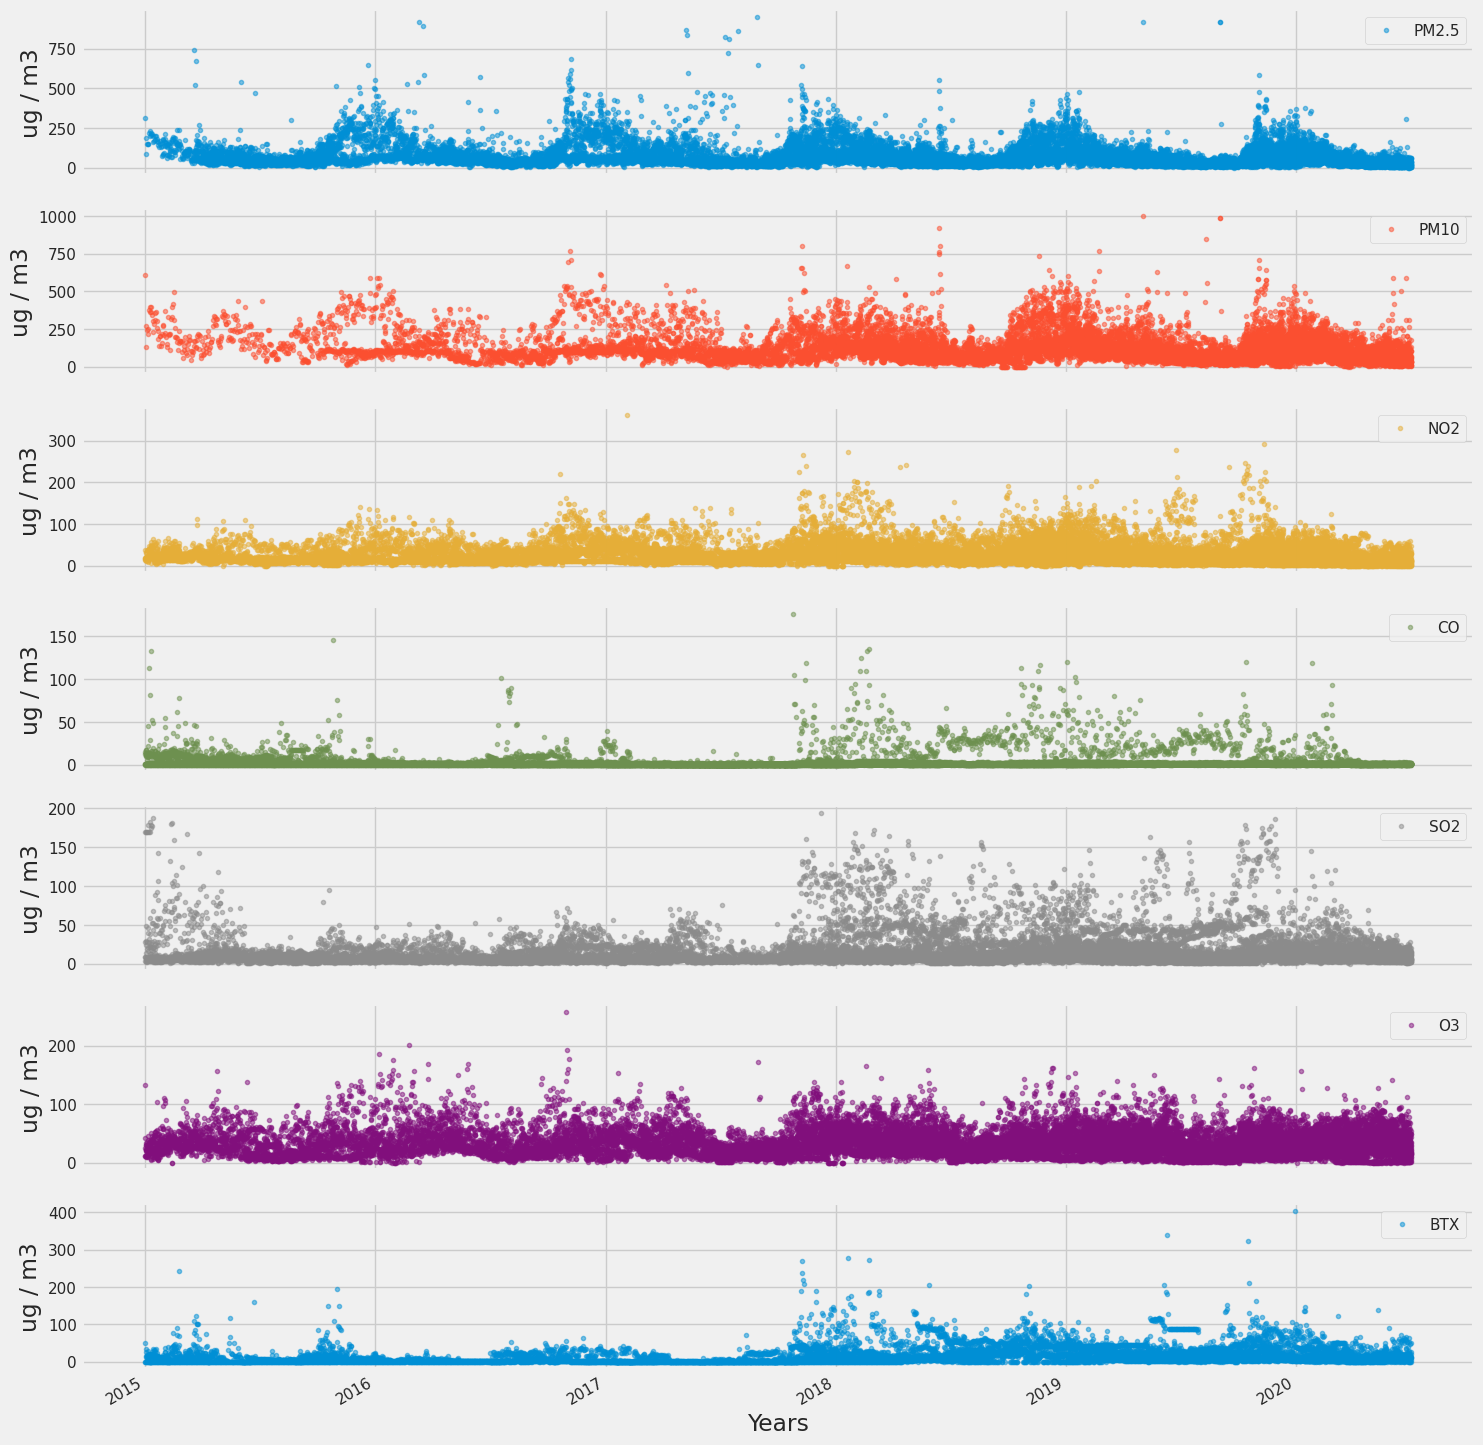

In [12]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [13]:
def trend_plot(df,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

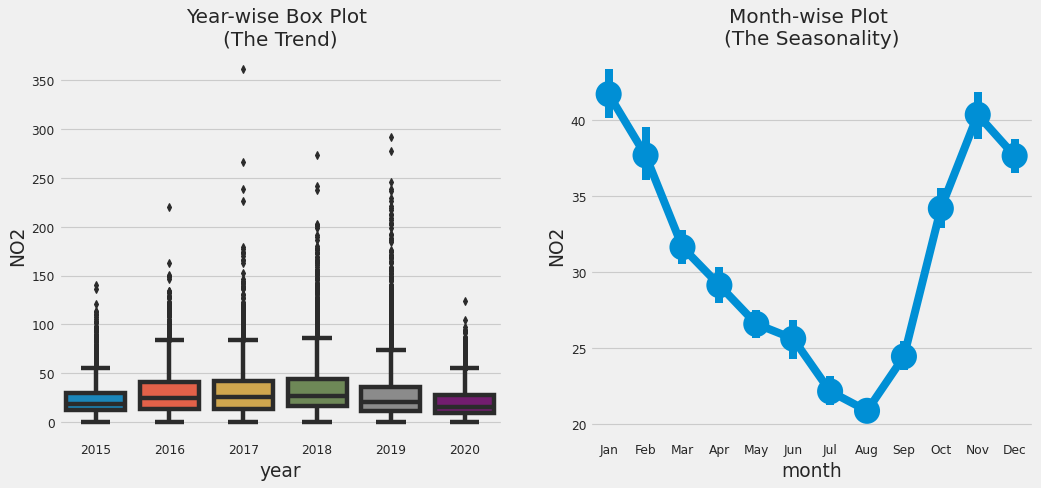

In [14]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)

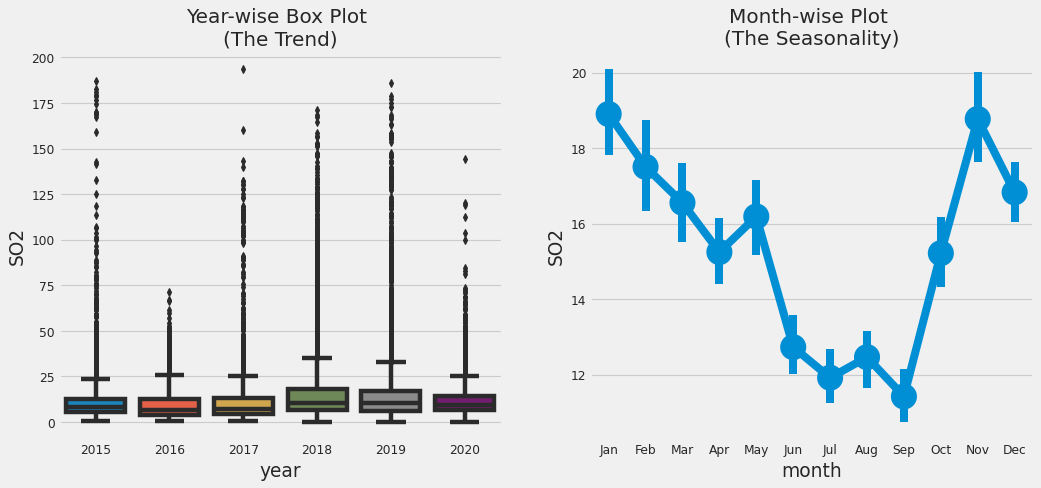

In [15]:
#city_day.reset_index(inplace=True)
df = city_day.copy()
value='SO2'
trend_plot(df,value)

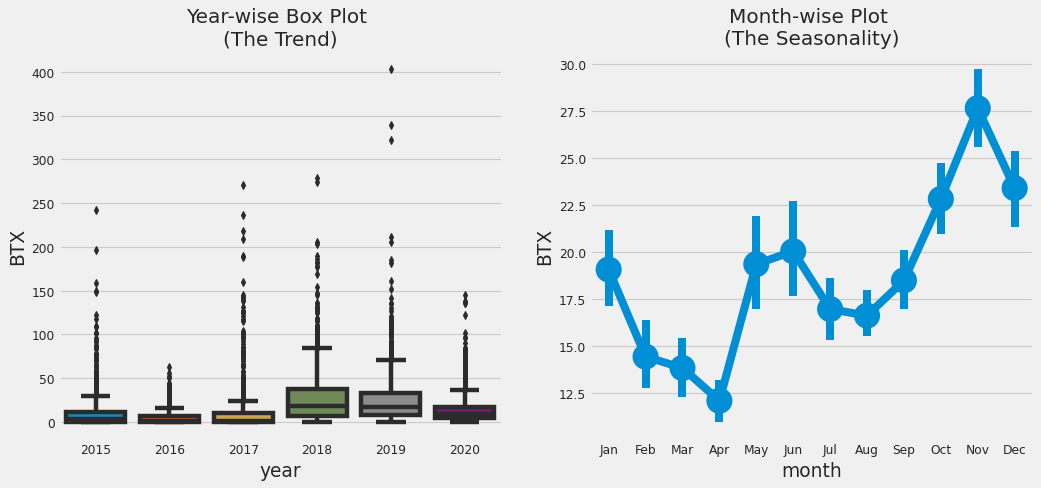

In [16]:
value='BTX'
trend_plot(df,value)

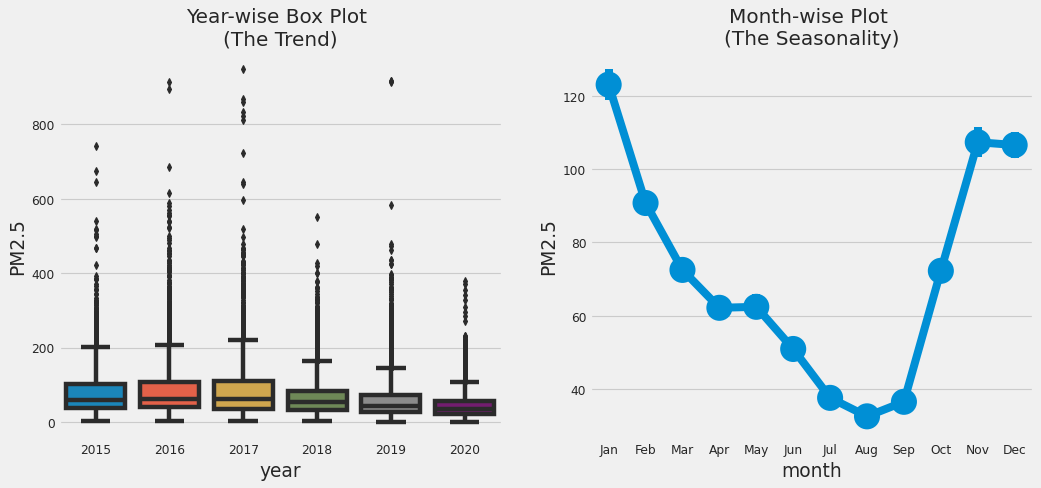

In [17]:
value='PM2.5'
trend_plot(df,value)

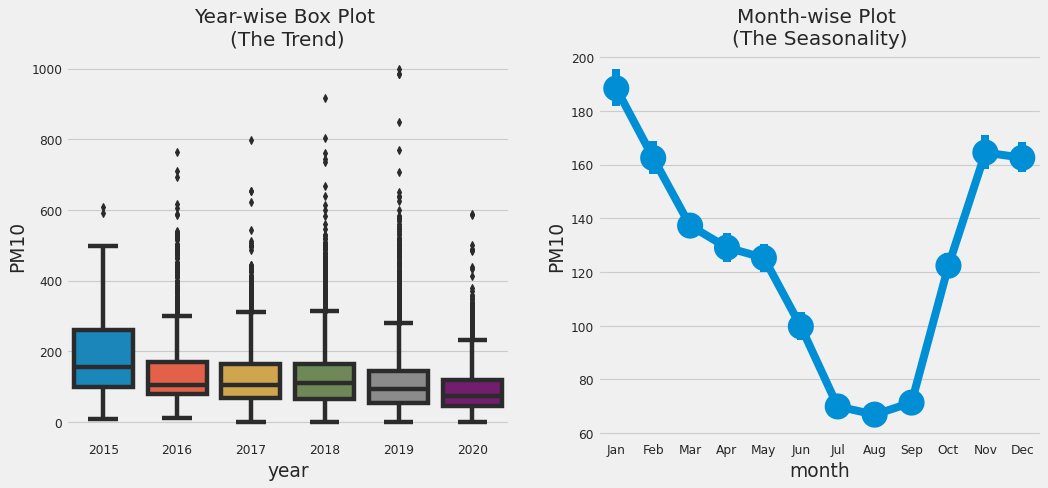

In [18]:
value='PM10'
trend_plot(df,value)

In [19]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [20]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [22]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


#display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

In [23]:
x2= city_day[['PM2.5','City']].groupby(["City"]).median().sort_values(by='PM2.5',ascending=False).reset_index()
x3 = city_day[['PM10','City']].groupby(["City"]).median().sort_values(by='PM10',ascending=False).reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("PM2.5","PM10"))

fig.add_trace(go.Bar( y=x2['PM2.5'], x=x2["City"],  
                     marker=dict(color=x2['PM2.5'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x3['PM10'], x=x2["City"],  
                     marker=dict(color=x3['PM10'], coloraxis="coloraxis")),
              1, 2)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.show()

In [24]:
x4= city_day[['CO','City']].groupby(["City"]).median().sort_values(by='CO',ascending=False).reset_index()
x5 = city_day[['NO2','City']].groupby(["City"]).median().sort_values(by='NO2',ascending=False).reset_index()
x6 = city_day[['SO2','City']].groupby(["City"]).median().sort_values(by='SO2',ascending=False).reset_index()


from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("CO","NO2",'SO2'))

fig.add_trace(go.Bar( y=x4['CO'], x=x4["City"],  
                     marker=dict(color=x4['CO'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x5['NO2'], x=x5["City"],  
                     marker=dict(color=x5['NO2'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar( y=x6['SO2'], x=x5["City"],  
                     marker=dict(color=x6['SO2'], coloraxis="coloraxis")),
              1, 3)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.show()

In [25]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.0,Severe
1462,2019-01-02,Ahmedabad,1246.0,Severe
1463,2019-01-03,Ahmedabad,1719.0,Severe
1464,2019-01-04,Ahmedabad,1264.0,Severe
1465,2019-01-05,Ahmedabad,1127.0,Severe


In [26]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

In [27]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [48]:
print(AQI_beforeLockdown.mean(),"\n")
print(AQI_afterLockdown.mean())

City
Ahmedabad    383.776471
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Mumbai       148.776471
dtype: float64 

City
Ahmedabad    127.810811
Bengaluru     68.486486
Chennai       62.351351
Delhi        107.270270
Hyderabad     65.567568
Mumbai        73.891892
dtype: float64


In [31]:
print(AQI_beforeLockdown.median(),"\n")
print(AQI_afterLockdown.median())

City
Ahmedabad    302.0
Bengaluru     96.0
Chennai       76.0
Delhi        253.0
Hyderabad     86.0
Mumbai       142.0
dtype: float64 

City
Ahmedabad    122.0
Bengaluru     67.0
Chennai       60.0
Delhi        103.0
Hyderabad     66.0
Mumbai        75.0
dtype: float64


In [35]:
print(AQI_beforeLockdown.std(),"\n")
print(AQI_afterLockdown.std())


City
Ahmedabad    256.592385
Bengaluru     13.955692
Chennai       24.726221
Delhi         91.436294
Hyderabad     24.723927
Mumbai        45.931724
dtype: float64 

City
Ahmedabad    35.140067
Bengaluru     7.178756
Chennai       6.925060
Delhi        25.777519
Hyderabad     9.194021
Mumbai       10.129121
dtype: float64


In [36]:
print(AQI_beforeLockdown.var(),"\n")
print(AQI_afterLockdown.var())



City
Ahmedabad    65839.651821
Bengaluru      194.761345
Chennai        611.385994
Delhi         8360.595798
Hyderabad      611.272549
Mumbai        2109.723249
dtype: float64 

City
Ahmedabad    1234.824324
Bengaluru      51.534535
Chennai        47.956456
Delhi         664.480480
Hyderabad      84.530030
Mumbai        102.599099
dtype: float64


In [37]:
print(AQI_beforeLockdown.skew(),"\n")
print(AQI_afterLockdown.skew())


City
Ahmedabad    1.917118
Bengaluru    0.456626
Chennai      3.477290
Delhi        0.233261
Hyderabad    0.666556
Mumbai       0.338463
dtype: float64 

City
Ahmedabad    0.677897
Bengaluru    1.115860
Chennai      0.539343
Delhi        0.167882
Hyderabad    0.432965
Mumbai       0.103587
dtype: float64


In [38]:
print(AQI_beforeLockdown.kurt(),"\n")
print(AQI_afterLockdown.kurt())

City
Ahmedabad     3.815197
Bengaluru     0.195982
Chennai      16.964938
Delhi        -0.293649
Hyderabad    -0.695037
Mumbai       -0.592687
dtype: float64 

City
Ahmedabad   -0.486596
Bengaluru    3.537331
Chennai     -0.189701
Delhi        0.021997
Hyderabad    0.006312
Mumbai      -0.808838
dtype: float64


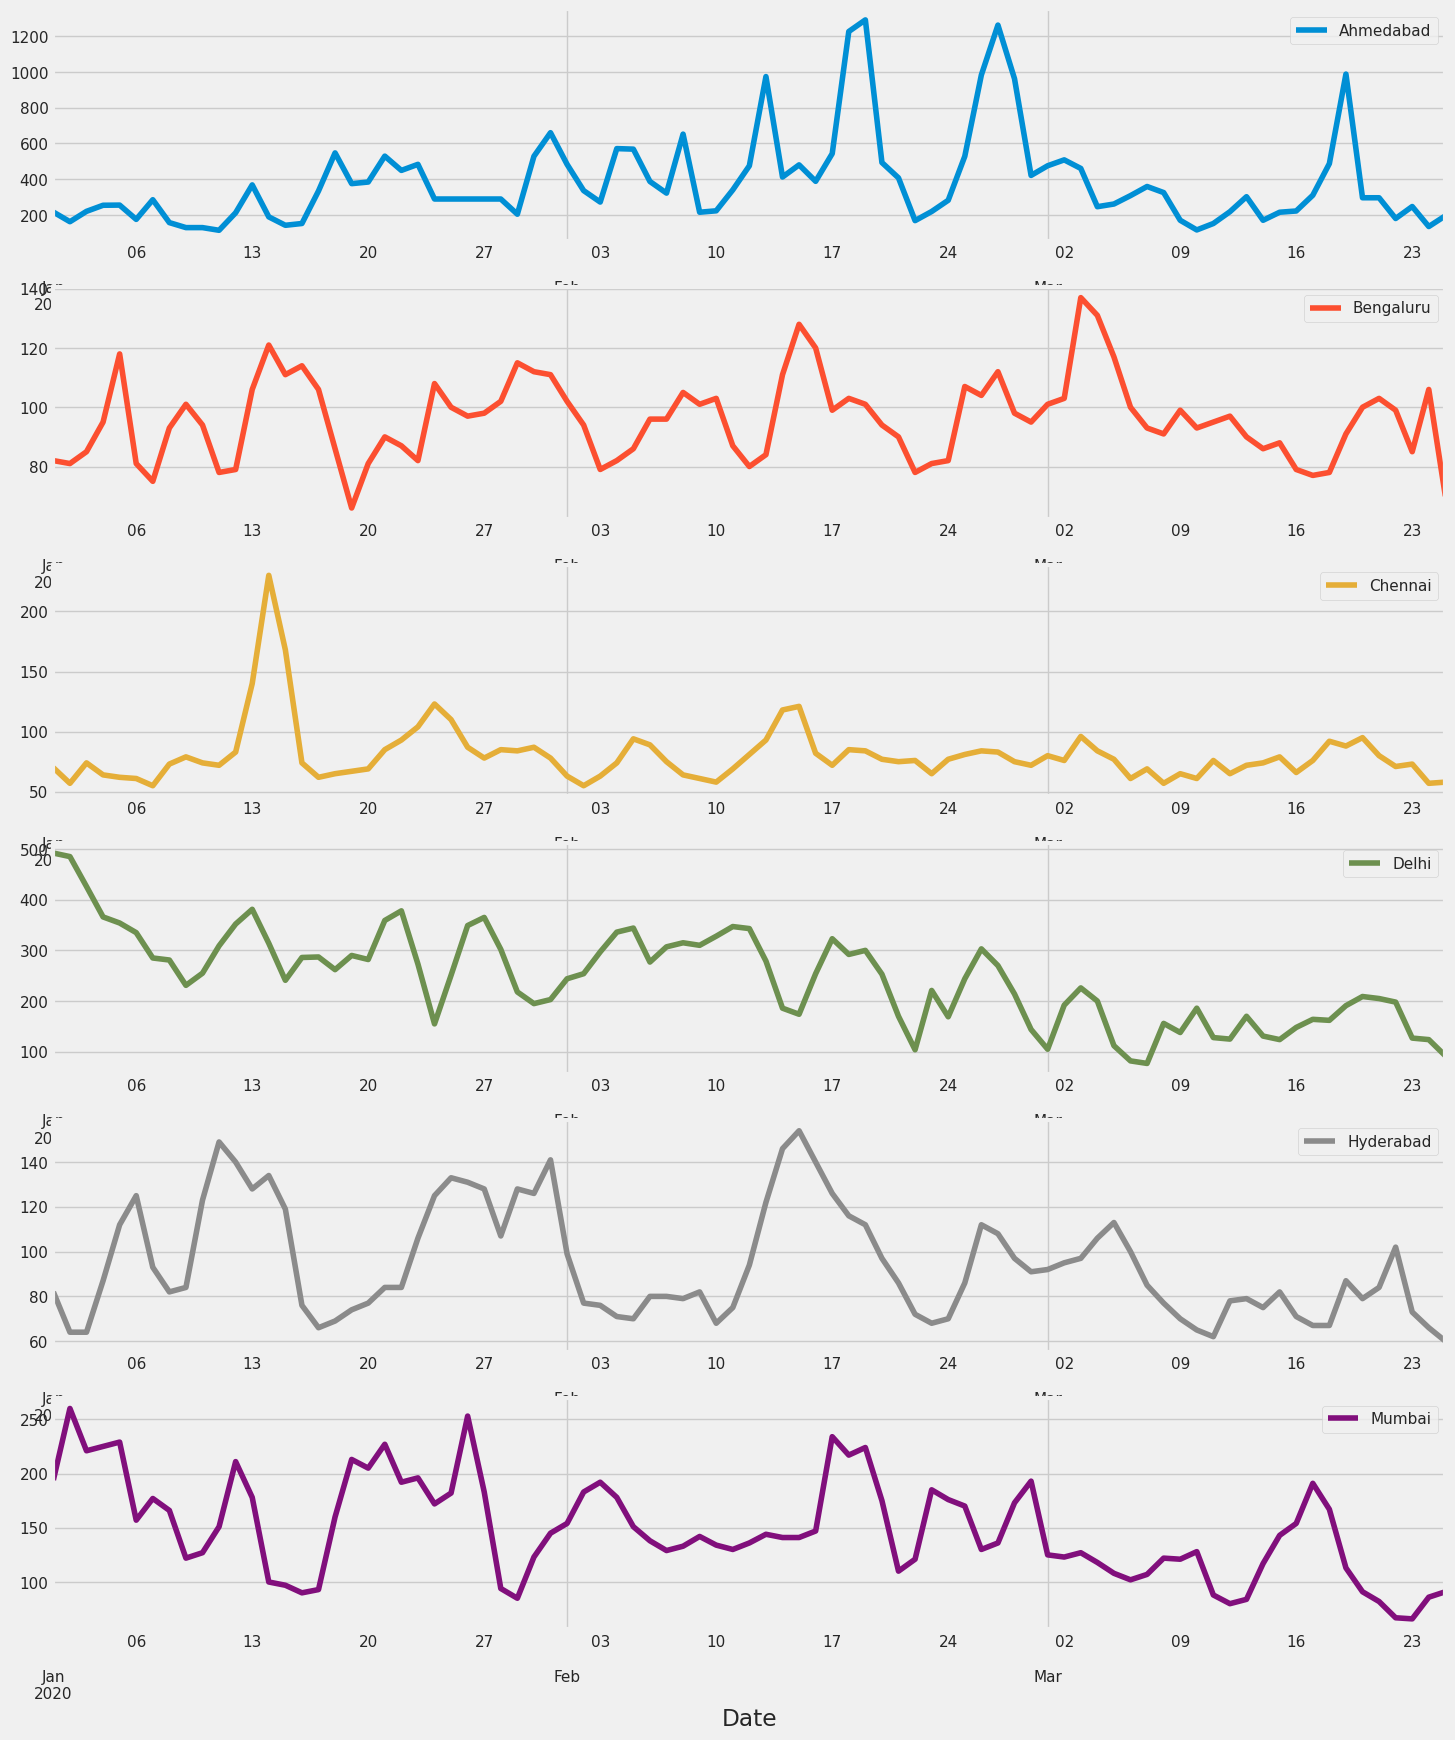

In [64]:
plotAQIBeforeLock = AQI_beforeLockdown.plot(kind='line',subplots=True,sharex=False,figsize=(16,20))

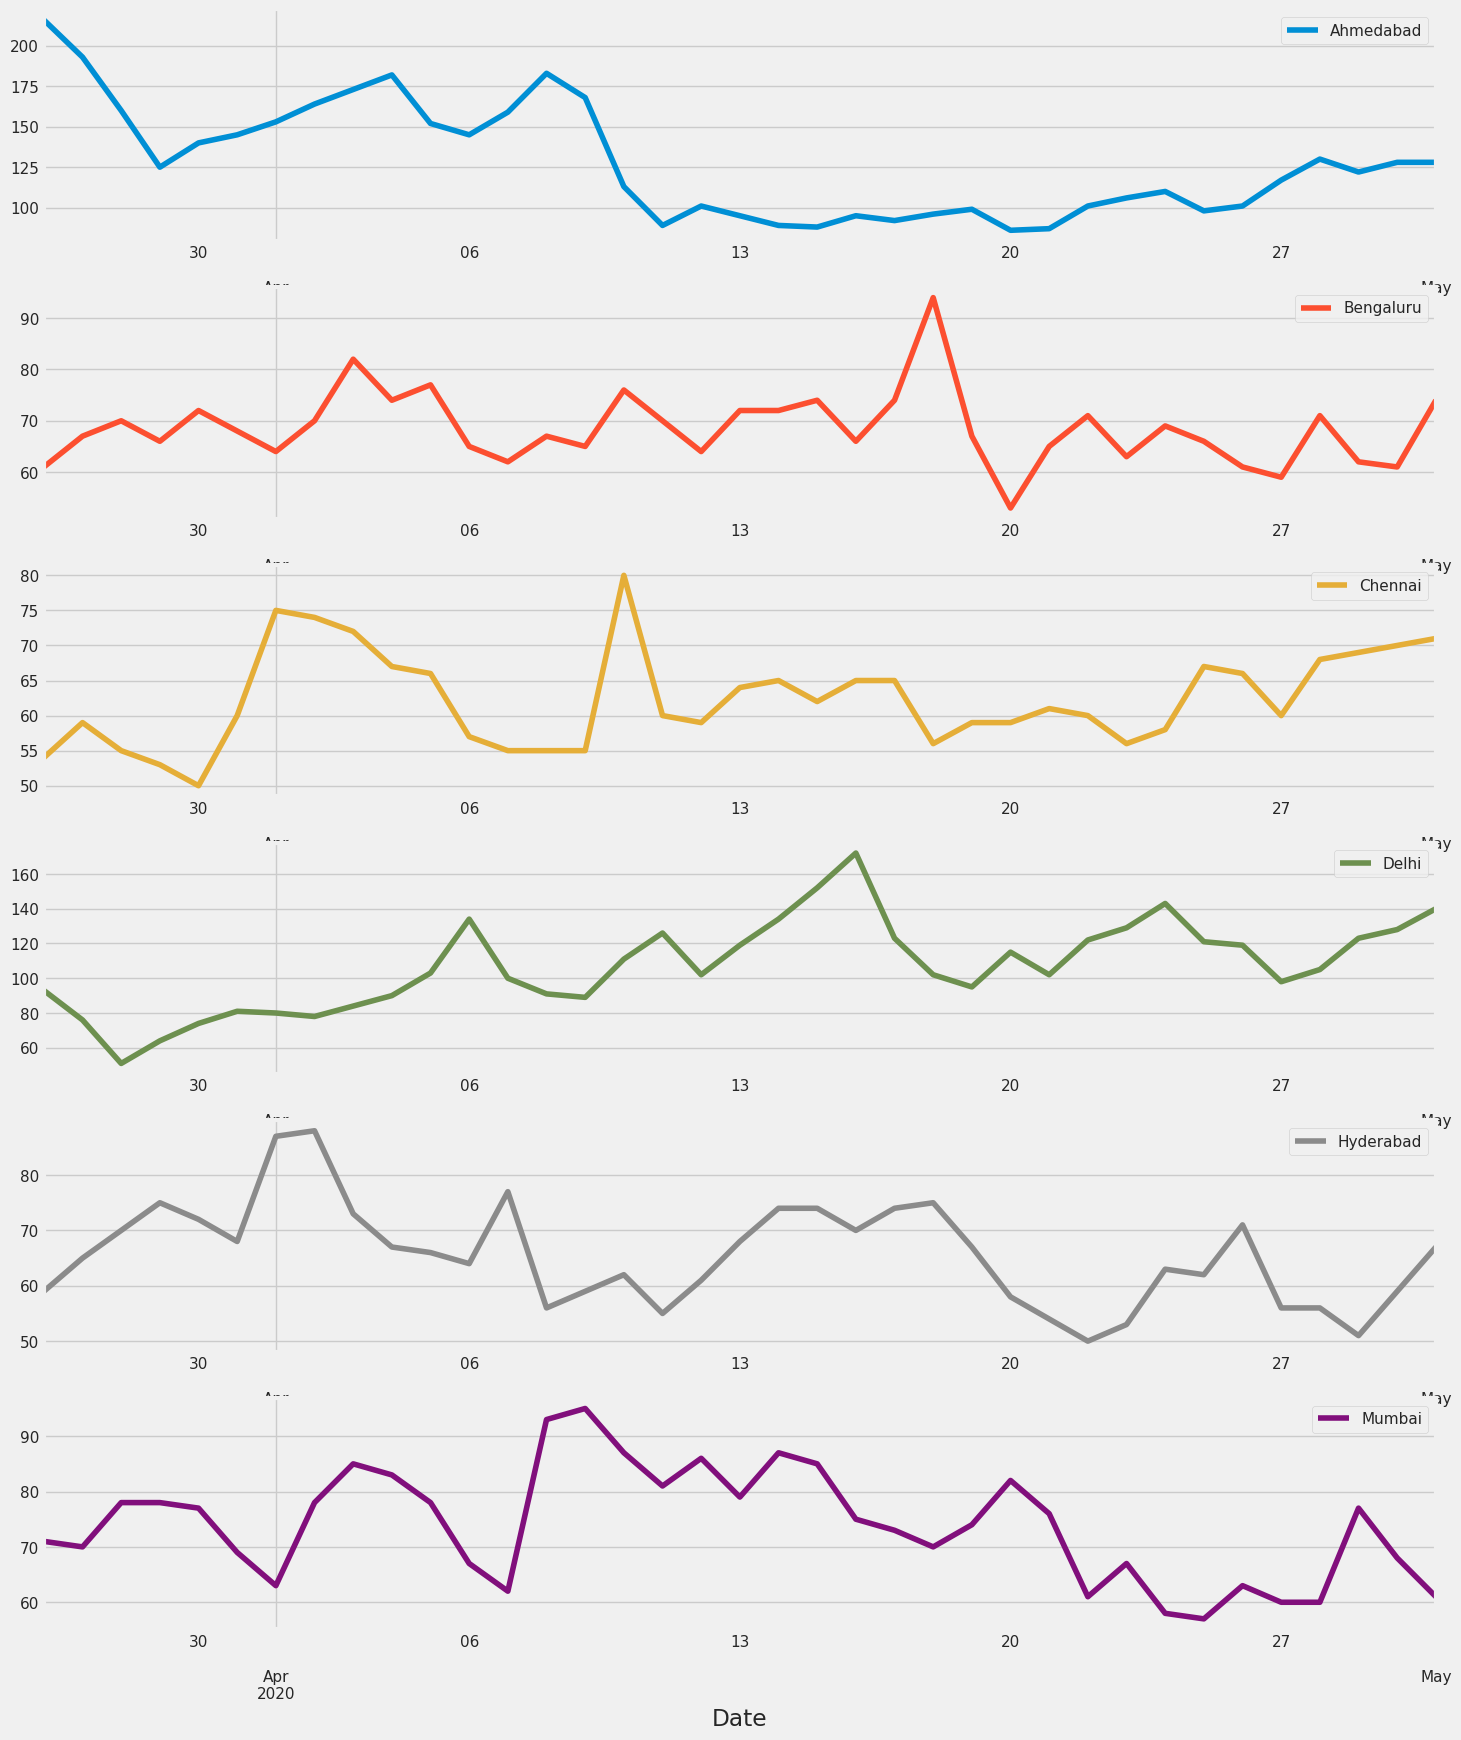

In [62]:
plotAQIAfterLock = AQI_afterLockdown.plot(kind='line',subplots=True,sharex=False,figsize=(16,20))

In [51]:
plotAQItrendCorrelation = AQI_pivot.corr("spearman")
print(plotAQItrendCorrelation)

City       Ahmedabad  Bengaluru   Chennai     Delhi  Hyderabad    Mumbai
City                                                                    
Ahmedabad   1.000000   0.331365  0.245684  0.222872   0.208044  0.263699
Bengaluru   0.331365   1.000000  0.185145  0.483998   0.705855  0.584479
Chennai     0.245684   0.185145  1.000000  0.153713   0.131169 -0.071869
Delhi       0.222872   0.483998  0.153713  1.000000   0.622884  0.670132
Hyderabad   0.208044   0.705855  0.131169  0.622884   1.000000  0.718829
Mumbai      0.263699   0.584479 -0.071869  0.670132   0.718829  1.000000


In [52]:
plotAQItrendCorrelation = AQI_pivot.corr("pearson")
print(plotAQItrendCorrelation)

City       Ahmedabad  Bengaluru   Chennai     Delhi  Hyderabad    Mumbai
City                                                                    
Ahmedabad   1.000000   0.374237  0.156746  0.272408   0.236245  0.245403
Bengaluru   0.374237   1.000000  0.270886  0.363929   0.622441  0.373512
Chennai     0.156746   0.270886  1.000000  0.233262   0.228224 -0.000521
Delhi       0.272408   0.363929  0.233262  1.000000   0.592015  0.632553
Hyderabad   0.236245   0.622441  0.228224  0.592015   1.000000  0.654165
Mumbai      0.245403   0.373512 -0.000521  0.632553   0.654165  1.000000
